In [319]:
import pandas as pd
import matplotlib.pyplot as plt


In [320]:
df1=pd.read_csv('train.csv')

In [321]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [322]:
# we can drop PassengeId,Name,Ticket,Cabin,Embarked

df1.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [323]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [324]:
# checking how many missing values are present
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [325]:
#lets fill the age columns

In [326]:
import seaborn as sns

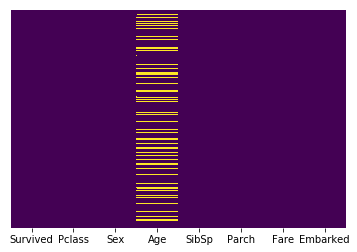

In [327]:
#lets lookout the missing values in a heatmap
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

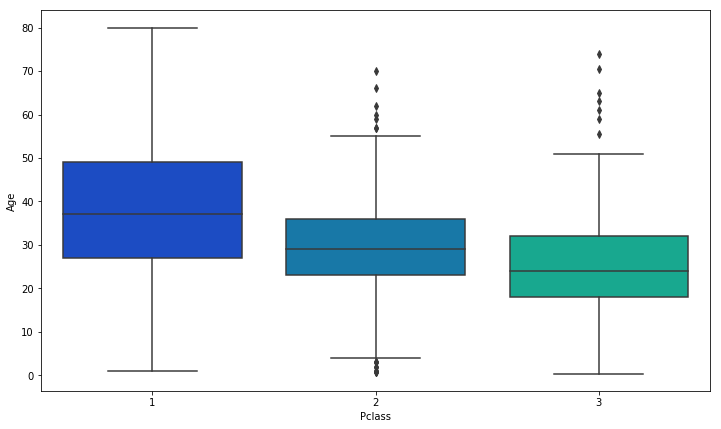

In [328]:
#for age lets lookout a box plot to see the relation between Pclass and age

plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df1,palette='winter')

In [329]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
     
    else:
        return Age

In [330]:
df1['Age']=df1[['Age','Pclass']].apply(impute_age,axis=1)

In [331]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [332]:
# now lets go to the Embarked column
df1['Embarked'].fillna(df1['Embarked'].mode()[0],inplace=True) 

In [333]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [334]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [335]:
#now we are moving towards to handle the categorical values, here Sex is a categorical one

l_Sex_dummy=pd.get_dummies(df1['Sex'],drop_first=True)

In [336]:
df1=pd.concat([df1,l_Sex_dummy],axis=1)

In [337]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [338]:
#Now drop the Sex column 
df1.drop(['Sex'],axis=1,inplace=True)



In [339]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [340]:
l_Embarked_dummy1=pd.get_dummies(df1['Embarked'],drop_first=False)

In [341]:
df1=pd.concat([df1,l_Embarked_dummy1],axis=1)

In [342]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,C,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,0,1
1,1,1,38.0,1,0,71.2833,C,0,1,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,0,1


In [343]:
df1.drop(['Embarked'],axis=1,inplace=True)

In [344]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [345]:
# now lets scale this age and fare column 

from sklearn.preprocessing import StandardScaler

In [346]:
sts=StandardScaler()

In [347]:
feature_scale=['Age','Fare']
df1[feature_scale]=sts.fit_transform(df1[feature_scale])

In [348]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,-0.533834,1,0,-0.502445,1,0,0,1
1,1,1,0.674891,1,0,0.786845,0,1,0,0
2,1,3,-0.231653,0,0,-0.488854,0,0,0,1
3,1,1,0.448255,1,0,0.420730,0,0,0,1
4,0,3,0.448255,0,0,-0.486337,1,0,0,1


In [349]:
X=df1.drop(['Survived'],axis=1)
y=df1.Survived

In [350]:
#train_test_split the existing data
#from sklearn.model_selection import train_test_split

In [351]:
#now we have to select which model we need to choose for better prediction
# we are using grid_search_cv

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [352]:
#create a model param
model_param = {
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion': ['gini','entropy']
        }
    },
        'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors': [5,10,15,20,25]
        }
    },
        'SVC':{
        'model':SVC(),
        'param':{
            'kernel':['rbf','linear','sigmoid'],
            'C': [0.1, 1, 10, 100]
         
        }
    }
}

In [353]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [354]:
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,DecisionTreeClassifier,0.773288,{'criterion': 'gini'}
1,KNeighborsClassifier,0.801347,{'n_neighbors': 20}
2,SVC,0.826038,"{'C': 10, 'kernel': 'rbf'}"


In [355]:
# here we come to know that SVC is giving best score 
#so implement the model as svm

final_model = SVC( C= 100,kernel='rbf')

In [356]:
final_model.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [357]:
df2=pd.read_csv('test.csv')

In [358]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [359]:
df2.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


In [360]:
df2['Age']=df2[['Age','Pclass']].apply(impute_age,axis=1)

In [361]:
df2['Embarked'].fillna(df2['Embarked'].mode()[0],inplace=True) 

In [362]:
l_Sex_dummy=pd.get_dummies(df2['Sex'],drop_first=True)

In [363]:
df2=pd.concat([df2,l_Sex_dummy],axis=1)

In [364]:
df2.drop(['Sex'],axis=1,inplace=True)


In [365]:
df2.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0


In [366]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
male             0
dtype: int64

In [367]:
df2['Fare'].fillna(df2['Fare'].mode()[0],inplace=True) 

In [368]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
male             0
dtype: int64

In [369]:
df2.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0


In [370]:
l_Embarked_dummy2=pd.get_dummies(df2['Embarked'],drop_first=False)

In [371]:
df2=pd.concat([df2,l_Embarked_dummy2],axis=1)

In [372]:
df2.drop(['Embarked'],axis=1,inplace=True)

In [373]:
df2.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,C,Q,S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,0,1


In [374]:
feature_scale=['Age','Fare']
df2[feature_scale]=sts.fit_transform(df2[feature_scale])

In [375]:
df2.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,C,Q,S
0,892,3,"Kelly, Mr. James",0.401768,0,0,330911,-0.497063,NaN,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1.371615,1,0,363272,-0.511926,NaN,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",2.535433,0,0,240276,-0.463754,NaN,1,0,1,0
3,895,3,"Wirz, Mr. Albert",-0.180141,0,0,315154,-0.482127,NaN,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",-0.568080,1,1,3101298,-0.417151,NaN,0,0,0,1


In [376]:
y_predicted = final_model.predict(df2)

ValueError: could not convert string to float: 'Peter, Master. Michael J'

In [382]:
df3 = pd.DataFrame({
        "PassengerId": df2['PassengerId'],
        "Survived": y_predicted
    })

In [383]:
df3.to_csv("final_output.csv",index=False)